In [28]:
#Kmeans

# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [29]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
# statistics of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [31]:
# There is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

# Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [32]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [33]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [34]:
# inertia on the fitted data
kmeans.inertia_

2599.384423783626

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

Text(0, 0.5, 'Inertia')

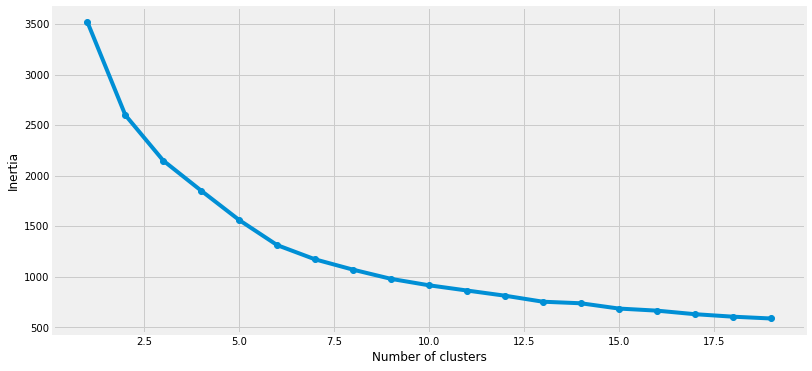

In [35]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [36]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 3, 4, 4, 0, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 4, 0, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 0, 0, 4, 0,

In [37]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


In [38]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [39]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [40]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [41]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [43]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [44]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [45]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [46]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [47]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [48]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [49]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [50]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


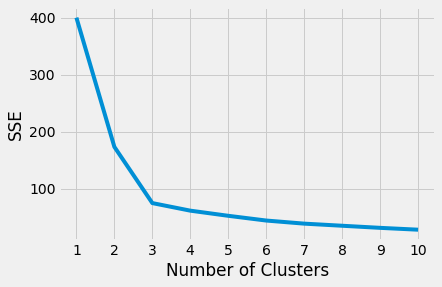

In [51]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [52]:
#PCA 
from numpy import array
from numpy.linalg import eig
A = array([[5, 4, 11, 10, 5, 4], [4, 5, 10, 11, 5, 3], [11, 10, 25, 24, 2, 3], [10, 11, 24, 25, 4, 5]])
print(A)

[[ 5  4 11 10  5  4]
 [ 4  5 10 11  5  3]
 [11 10 25 24  2  3]
 [10 11 24 25  4  5]]


In [53]:
AT=A.transpose()
print(AT)

[[ 5  4 11 10]
 [ 4  5 10 11]
 [11 10 25 24]
 [10 11 24 25]
 [ 5  5  2  4]
 [ 4  3  3  5]]


In [54]:
import numpy as np
AAT=np.matmul(A, AT)
print(AAT)

[[ 303  297  632  648]
 [ 297  296  627  645]
 [ 632  627 1435 1443]
 [ 648  645 1443 1463]]


In [55]:
from numpy import linalg as LA
w, v=LA.eig(AAT) # drop one column
print(v)
print(w)


[[ 0.28881242  0.62977005  0.66093493  0.2883437 ]
 [ 0.28673804  0.57650943 -0.38655789 -0.66029627]
 [ 0.64185219 -0.52019967  0.39181653 -0.40484304]
 [ 0.6499188  -0.0204661  -0.5101155   0.56299988]]
[3.46061753e+03 3.17820779e+01 3.82607663e+00 7.74319458e-01]


In [56]:
w.sort(axis=-1) # Sort the Eigen Values in Asending Order
print(w)
w[1:] # Top 3 elements in a Sorted array

[7.74319458e-01 3.82607663e+00 3.17820779e+01 3.46061753e+03]


array([   3.82607663,   31.78207793, 3460.61752598])

In [57]:
# Method 1: v[:,0:3] # First Three Vectors

# Method 2" Delete column at index 3, as its EigenValue is Very Small

FinalSelectedVectors = np.delete(v, 3, axis=1)
print('Modified Eigen Vectors by removing columns at index 3')
print(FinalSelectedVectors)



Modified Eigen Vectors by removing columns at index 3
[[ 0.28881242  0.62977005  0.66093493]
 [ 0.28673804  0.57650943 -0.38655789]
 [ 0.64185219 -0.52019967  0.39181653]
 [ 0.6499188  -0.0204661  -0.5101155 ]]


In [58]:
# Append two Zero Rows at the end of the Selected Eigen Vectors
AppendedVectors = np.insert(FinalSelectedVectors,[4], [[0],[0], ], axis = 0) 
print(AppendedVectors)

[[ 0.28881242  0.62977005  0.66093493]
 [ 0.28673804  0.57650943 -0.38655789]
 [ 0.64185219 -0.52019967  0.39181653]
 [ 0.6499188  -0.0204661  -0.5101155 ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [59]:
PCA=np.matmul(A, AppendedVectors)

print(PCA)

[[ 1.61505764e+01 -4.71969414e-01  9.67269827e-01]
 [ 1.61565686e+01 -2.54964639e-02 -9.82155022e-01]
 [ 3.76886730e+01 -8.03613333e-01  9.57346364e-01]
 [ 3.76946652e+01 -3.57140383e-01 -9.92078486e-01]]


In [60]:
U, s, V = np.linalg.svd(A, full_matrices=True) # , compute_uv=True

In [61]:
U.shape, V.shape, s.shape


((4, 4), (6, 6), (4,))

In [62]:
print(U)
print(V)
print(s)

[[-0.28881242 -0.62977005 -0.66093493  0.2883437 ]
 [-0.28673804 -0.57650943  0.38655789 -0.66029627]
 [-0.64185219  0.52019967 -0.39181653 -0.40484304]
 [-0.6499188   0.0204661   0.5101155   0.56299988]]
[[-2.74543537e-01 -2.74645399e-01 -6.40669494e-01 -6.40771356e-01
  -1.14932435e-01 -1.22233205e-01]
 [ 8.37187454e-02  4.52260655e-03  1.42546313e-01  6.33501745e-02
  -8.70790561e-01 -4.58652178e-01]
 [-4.94505138e-01  5.02115016e-01 -4.89431886e-01  5.07188268e-01
  -5.88211170e-02 -5.56933000e-02]
 [-2.58436285e-02 -4.02097135e-03 -4.57533617e-02 -2.39307046e-02
  -4.74398999e-01  8.78405077e-01]
 [-7.88956943e-01  1.37496521e-02  5.67469146e-01 -2.35237450e-01
  -4.98407683e-16  1.86612882e-15]
 [ 2.23518981e-01  8.19893127e-01  7.45987640e-02 -5.21775382e-01
   5.06706309e-17 -5.13187229e-16]]
[58.82701357  5.63755957  1.95603595  0.87995424]
